# ANALISIS EXPLORATORIO DE DATOS

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
# Importar archivo para trabajar
df = pd.read_csv('../01 - ETL/06 - Dataset Para Funciones y EDA/Data_Final.csv')

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 22503 entries, 0 to 22502
Data columns (total 30 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   adult              22503 non-null  bool   
 1   budget             22503 non-null  float64
 2   id                 22503 non-null  int64  
 3   imdb_id            22495 non-null  object 
 4   original_language  22499 non-null  object 
 5   overview           22039 non-null  object 
 6   popularity         22503 non-null  float64
 7   release_date       22503 non-null  object 
 8   revenue            22503 non-null  float64
 9   runtime            22503 non-null  int64  
 10  status             22462 non-null  object 
 11  tagline            10218 non-null  object 
 12  title              22503 non-null  object 
 13  vote_average       22503 non-null  float64
 14  vote_count         22503 non-null  float64
 15  id.1               22503 non-null  int64  
 16  Actor              225

In [4]:
# Calcula el porcentaje de valores faltantes en cada columna
missing_percentage = df.isnull().mean() * 100

# Filtra las columnas que tienen valores faltantes
columns_with_missing_values = missing_percentage[missing_percentage > 0]

# Muestra el porcentaje de valores faltantes en cada columna
print("Porcentaje de valores faltantes por columna:")
print(columns_with_missing_values)

Porcentaje de valores faltantes por columna:
imdb_id               0.035551
original_language     0.017775
overview              2.061947
status                0.182198
tagline              54.592721
Director              1.839755
name_genres           5.057103
id_genres             5.057103
name_Spoken           8.301115
iso_639_1_Spoken      8.016709
id_prod              25.938764
name_prod            25.938764
iso_3166_1_Count     13.735946
name_Count           13.735946
Return               75.692130
dtype: float64


In [5]:
pd.set_option('display.max_columns', None)  # Mostrar todas las columnas

df.head(1)

,adult,budget,id,imdb_id,original_language,overview,popularity,release_date,revenue,runtime,status,tagline,title,vote_average,vote_count,id.1,Actor,Director,id_belong,name_belong,name_genres,id_genres,name_Spoken,iso_639_1_Spoken,id_prod,name_prod,iso_3166_1_Count,name_Count,release_year,Return
0,False,8000000.0,11050,tt0086425,en,Aurora and Emma are mother and daughter who ma...,8.785209,1983-11-20,0.0,132,Released,NaN,Terms of Endearment,6.9,178.0,11050,'Shirley MacLaine','James L. Brooks',0.0,0,Drama Comedy,18 35,English,en,4,Paramount Pictures,US,United States of America,1983,0.0


# Resumen Estadístico

In [6]:
df.describe()

,budget,id,popularity,revenue,runtime,vote_average,vote_count,id.1,id_belong,release_year,Return
count,2.250300e+04,22503.000000,22503.000000,2.250300e+04,22503.000000,22503.000000,22503.000000,22503.000000,22503.000000,22503.000000,5.470000e+03
mean,4.317178e+06,107282.925921,2.930140,1.159556e+07,94.180554,5.621215,111.507888,107412.545572,17856.413589,1992.406479,5.285209e+03
std,1.767381e+07,111942.113054,5.688174,6.561135e+07,37.663286,1.918857,491.207845,111848.160810,70246.660406,22.949500,2.146493e+05
min,0.000000e+00,6.000000,0.000000,0.000000e+00,0.000000,0.000000,0.000000,6.000000,0.000000,1921.000000,0.000000e+00
25%,0.000000e+00,26108.000000,0.392780,0.000000e+00,85.000000,5.000000,3.000000,26156.500000,0.000000,1979.000000,0.000000e+00
50%,0.000000e+00,58882.000000,1.132673,0.000000e+00,95.000000,6.000000,10.000000,59238.000000,0.000000,2001.000000,0.000000e+00
75%,0.000000e+00,154421.500000,3.748085,0.000000e+00,107.000000,6.800000,35.000000,155129.000000,0.000000,2010.000000,2.054378e+00
max,3.800000e+08,469172.000000,294.337037,2.068224e+09,1140.000000,10.000000,12269.000000,469172.000000,480071.000000,2020.000000,1.239638e+07


### Diccionario de la Tabla

In [7]:
column_description = {
    'id': 'ID de la película',
    'title': 'Título de la película',
    'overview': 'Descripción de la película',
    'popularity': 'Popularidad de la película',
    'vote_average': 'Promedio de votos de la película',
    'vote_count': 'Número de votos de la película',
    'status': 'Estado de la película',
    'original_language': 'Idioma original de la película',
    'runtime': 'Duración de la película en minutos',
    'budget': 'Presupuesto de la película',
    'revenue': 'Ingresos generados por la película',
    'tagline': 'Lema de la película',
    'id_btc': 'ID de la película en BTC',
    'name_btc': 'Nombre de la película en BTC',
    'poster_btc': 'URL del póster de la película en BTC',
    'backdrop_btc': 'URL del fondo de la película en BTC',
    'iso_639_1': 'Código ISO 639-1 del idioma',
    'language_name': 'Nombre del idioma',
    'release_year': 'Año de lanzamiento de la película',
    'return': 'Relación entre ingresos y presupuesto de la película',
    'companies_id': 'ID de las compañías de producción',
    'companies_name': 'Nombres de las compañías de producción',
    'countries_iso': 'Códigos ISO de los países de producción',
    'countries_name': 'Nombres de los países de producción',
    'release_date': 'Fecha de lanzamiento de la película',
    'month_time': 'Mes en el que se creó la película',
    'day_time': 'Día en el que se creó la película'
}

# Distribución de variables numéricas: 

Examina las variables numéricas, como "popularity", "vote_average", "vote_count", "runtime", "budget", "revenue", y "return". 

Calcula estadísticas descriptivas como la media, mediana, desviación estándar y percentiles para comprender la distribución de los datos.

### Gráficos De Caja Para Las Variables Numéricas

         popularity  vote_average    vote_count       runtime        budget  \
count  22503.000000  22503.000000  22503.000000  22503.000000  2.250300e+04   
mean       2.930140      5.621215    111.507888     94.180554  4.317178e+06   
std        5.688174      1.918857    491.207845     37.663286  1.767381e+07   
min        0.000000      0.000000      0.000000      0.000000  0.000000e+00   
25%        0.392780      5.000000      3.000000     85.000000  0.000000e+00   
50%        1.132673      6.000000     10.000000     95.000000  0.000000e+00   
75%        3.748085      6.800000     35.000000    107.000000  0.000000e+00   
max      294.337037     10.000000  12269.000000   1140.000000  3.800000e+08   

            revenue        Return  
count  2.250300e+04  5.470000e+03  
mean   1.159556e+07  5.285209e+03  
std    6.561135e+07  2.146493e+05  
min    0.000000e+00  0.000000e+00  
25%    0.000000e+00  0.000000e+00  
50%    0.000000e+00  0.000000e+00  
75%    0.000000e+00  2.054378e+00  


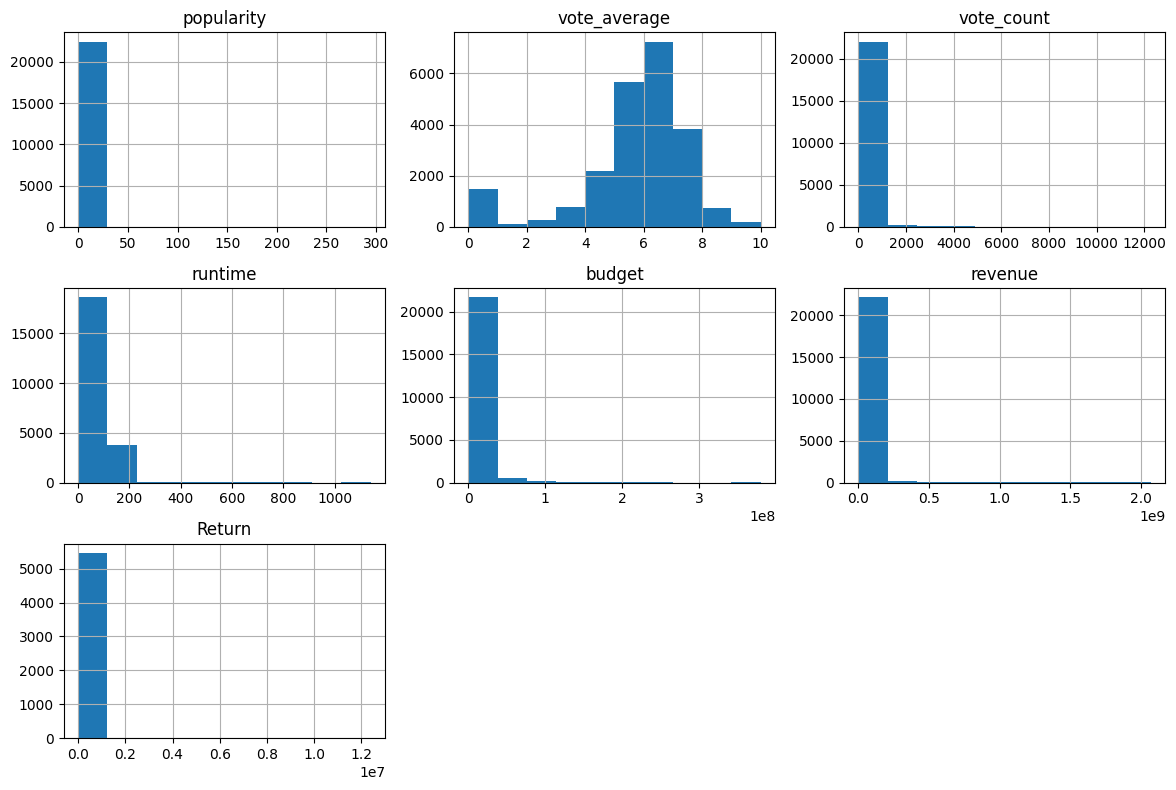

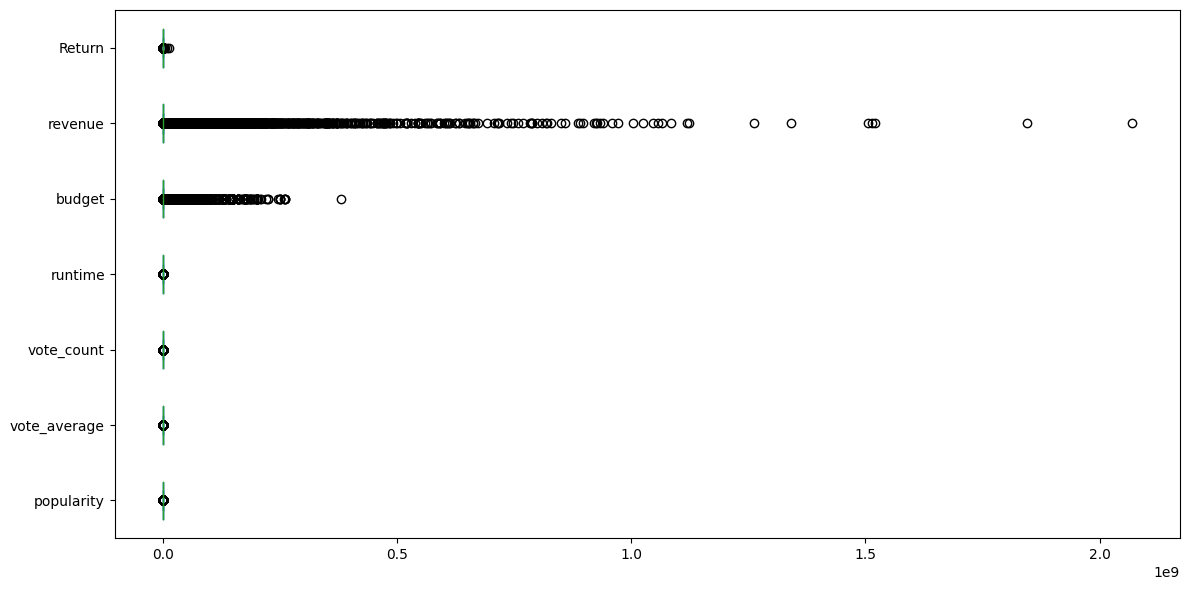

In [8]:
# Selecciona las variables numéricas de interés
numeric_variables = df[['popularity', 'vote_average', 'vote_count', 'runtime', 'budget', 'revenue', 'Return']]

# Calcula las estadísticas descriptivas
statistics = numeric_variables.describe()

# Imprime las estadísticas descriptivas
print(statistics)

# Genera histogramas para las variables numéricas
numeric_variables.hist(bins=10, figsize=(12, 8))
plt.tight_layout()
plt.show()

# Genera gráficos de caja para las variables numéricas
numeric_variables.plot(kind='box', vert=False, figsize=(12, 6))
plt.tight_layout()
plt.show()

## Idioma de peliculas

In [9]:
idioma=pd.DataFrame(df.groupby("original_language").size().sort_values(ascending=False))
idioma.rename(columns={0:"cantidad"}, inplace=True)
idioma.reset_index(inplace=True)
idioma=idioma[0:5]

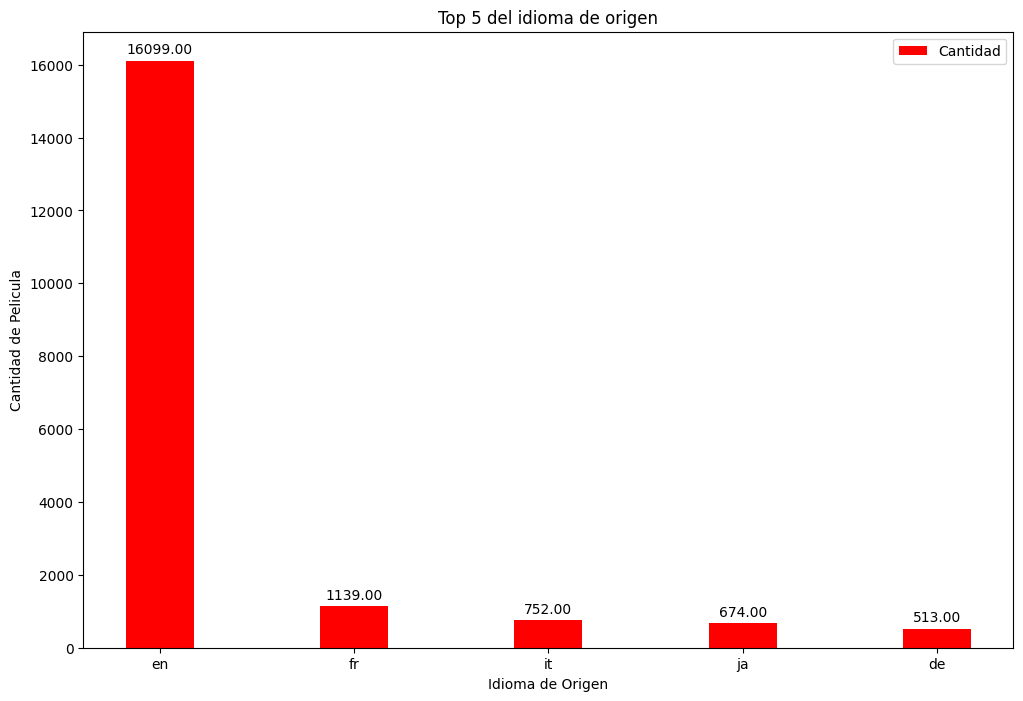

In [10]:
fig, ax = plt.subplots(figsize=(12, 8))
bar_width = 0.35
opacity = 0.8
bar1 = ax.bar( idioma["original_language"],idioma["cantidad"], bar_width, label='Cantidad', color="red")

# Configura el estilo del gráfico
ax.set_xlabel('Idioma de Origen')
ax.set_ylabel('Cantidad de Pelicula')
ax.set_title(f'Top 5 del idioma de origen')
ax.legend()

# Añade etiquetas a las barras
def autolabel(bars):
    for bar in bars:
        height = bar.get_height()
        ax.annotate('{:.2f}'.format(height),
                    xy=(bar.get_x() + bar.get_width() / 2, height),
                    xytext=(0, 3),
                    textcoords="offset points",
                    ha='center', va='bottom')

autolabel(bar1)



En el grafico anterior podemos ver que el idioma ingles estan las mayorias de las peliculas creadas.-

## Duracion de Peliculas

In [11]:
runtime=pd.DataFrame(df.groupby("runtime").size())
runtime.rename(columns={0:"cantidad"}, inplace=True)
runtime.reset_index(inplace=True)

Text(0.5, 1.0, 'Distribución en minutos de Pelicula')

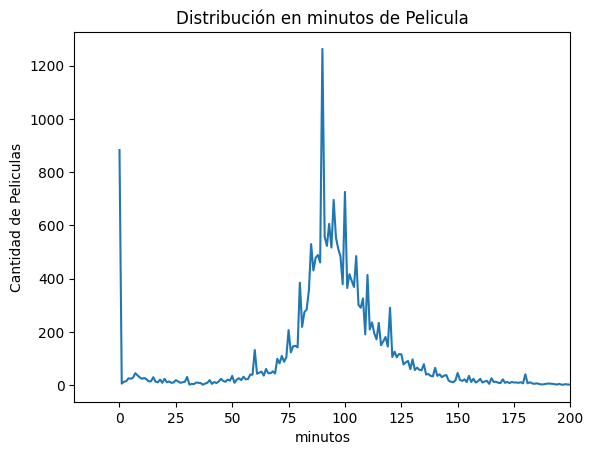

In [12]:
plt.plot(runtime["runtime"],runtime["cantidad"])
plt.xlabel('minutos')
plt.ylabel('Cantidad de Peliculas')
plt.xlim(-20,200)
plt.title('Distribución en minutos de Pelicula')

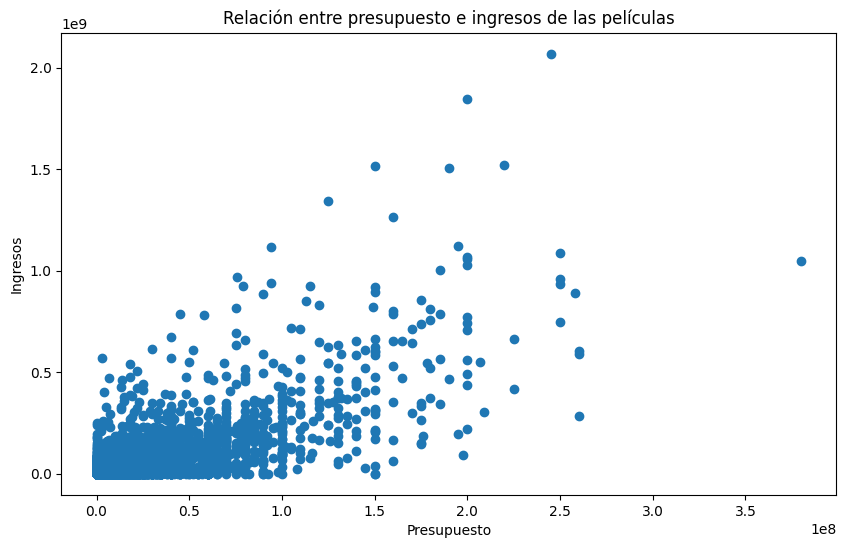

In [13]:
# Crea un gráfico de dispersión para visualizar los ingresos y presupuestos de las películas
fig, ax = plt.subplots(figsize=(10, 6))
ax.scatter(df['budget'], df['revenue'])
ax.set_xlabel('Presupuesto')
ax.set_ylabel('Ingresos')
ax.set_title('Relación entre presupuesto e ingresos de las películas')

plt.show()

# Visualizar El Top 5 De Peliculas Con Mayores Ingresos Y Presupuestos

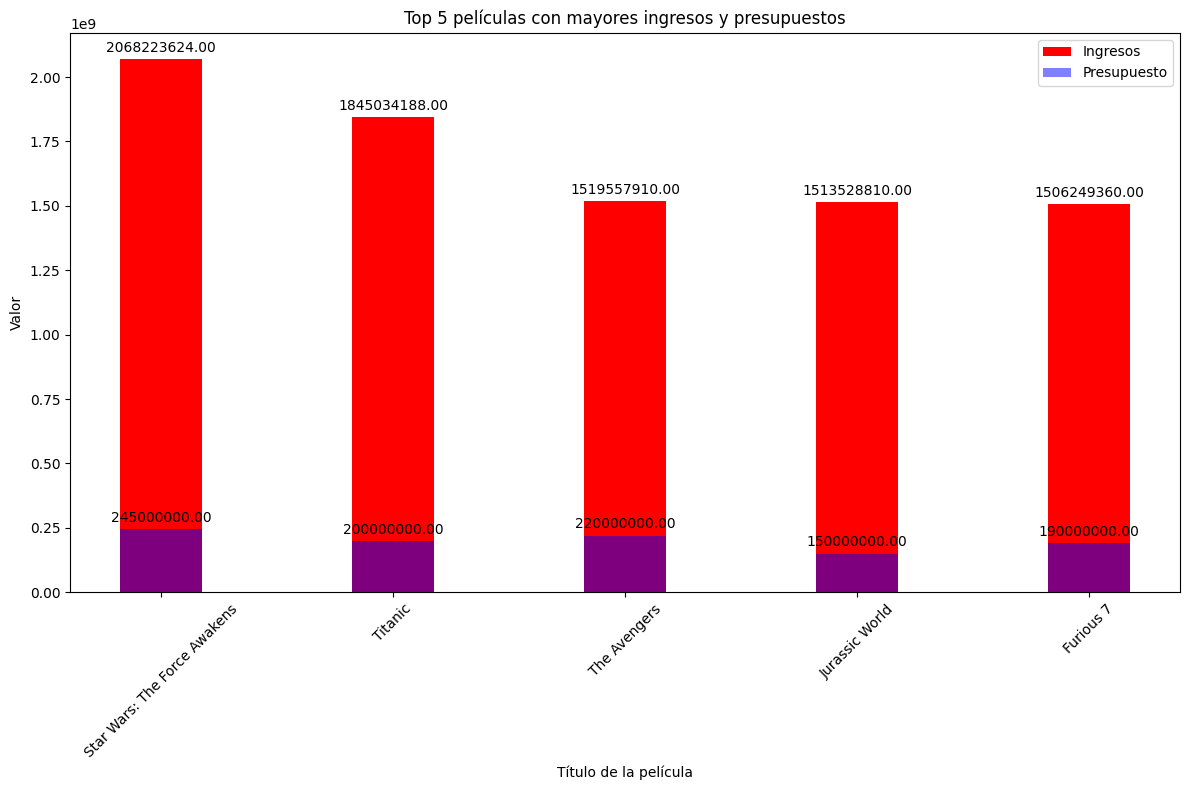

In [14]:
# Ordena el DataFrame por la columna 'revenue' en orden descendente
df_sorted = df.sort_values(by='revenue', ascending=False)

# Selecciona las primeras N películas con mayores ingresos
top_n = 5  # Cambia este valor según la cantidad de películas que desees mostrar
top_movies = df_sorted.head(top_n)

# Prepara los datos para el gráfico
index = top_movies['title']
revenue = top_movies['revenue']
budget = top_movies['budget']


# Crea el gráfico de barras agrupadas con colores pasteles
fig, ax = plt.subplots(figsize=(12, 8))
bar_width = 0.35
opacity = 0.8
bar1 = ax.bar(index, revenue, bar_width, label='Ingresos', color="red")
bar2 = ax.bar(index, budget, bar_width, label='Presupuesto', alpha=0.5, color="blue")

# Configura el estilo del gráfico
ax.set_xlabel('Título de la película')
ax.set_ylabel('Valor')
ax.set_title(f'Top {top_n} películas con mayores ingresos y presupuestos')
ax.legend()

# Añade etiquetas a las barras
def autolabel(bars):
    for bar in bars:
        height = bar.get_height()
        ax.annotate('{:.2f}'.format(height),
                    xy=(bar.get_x() + bar.get_width() / 2, height),
                    xytext=(0, 3),
                    textcoords="offset points",
                    ha='center', va='bottom')

autolabel(bar1)
autolabel(bar2)

plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

// Por hacer un sample los valores pueden cambiar//


Pero unas de las peliculas de mayor presupuesto e ingreso fue Furios 7, mas conocida como Rapido Y Furioso 7

Es el séptimo film de la saga, The Fast and the Furious, y también la secuela paralela de la película, Fast & Furious 6, así como también de su spin-off, The Fast and the Furious: Tokyo Drift. Esta película fue dedicada al actor Paul Walker, tras fallecer en noviembre de 2013 por un accidente automovilístico.

Los planes para una séptima entrega se anunciaron por primera vez en febrero de 2012 cuando Johnson declaró que la producción de la película comenzaría después de la finalización de Fast & Furious 6. En abril de 2013, Wan, predominantemente conocido por las películas de terror, fue anunciado para dirigir la película. El casting comenzó a mostrar los retornos de Diesel y Walker ese mismo mes. La fotografía principal comenzó en septiembre en Atlanta y terminó en julio de 2014 después de reanudarse en abril para permitir que los hermanos de Paul, Caleb y Cody, completaran las escenas restantes de la película, que se retrasó hasta su fecha de estreno actual; con otros lugares de rodaje, incluidos Los Ángeles, Colorado, Abu Dhabi y Tokio.

Furious 7 fue un gran éxito en taquilla, contando con presupuesto de $190 000 000, la película recaudó $147 187 040 en su primer fin de semana de estreno, superando el récord de Minions, Los juegos del hambre: sinsajo - Parte 2, Inside Out, American Sniper, Cincuenta sombras de Grey y Spectre y posicionandose como la cuarta película con mejores ingresos en primer fin de semana de estreno, sólo detrás de Star Wars: Episodio VII - El despertar de la Fuerza, Jurassic World y Avengers: Age of Ultron. logró recaudar $353 007 020 en Estados Unidos, mientras que en el resto del mundo logró un récord de hasta $ 1 163 038 891, logrando recaudar mundialmete hasta $ 1 516 045 911 logrando convertirse en la película más taquillera de la franquicia. Fue la tercera película más taquillera de 2015, sólo detrás de Star Wars: Episodio VII - El despertar de la Fuerza y Jurassic World.

# Visualizar El Top 5 De Peliculas Con Mayores Presupuestos Y Que No Tuvieron Ingresos

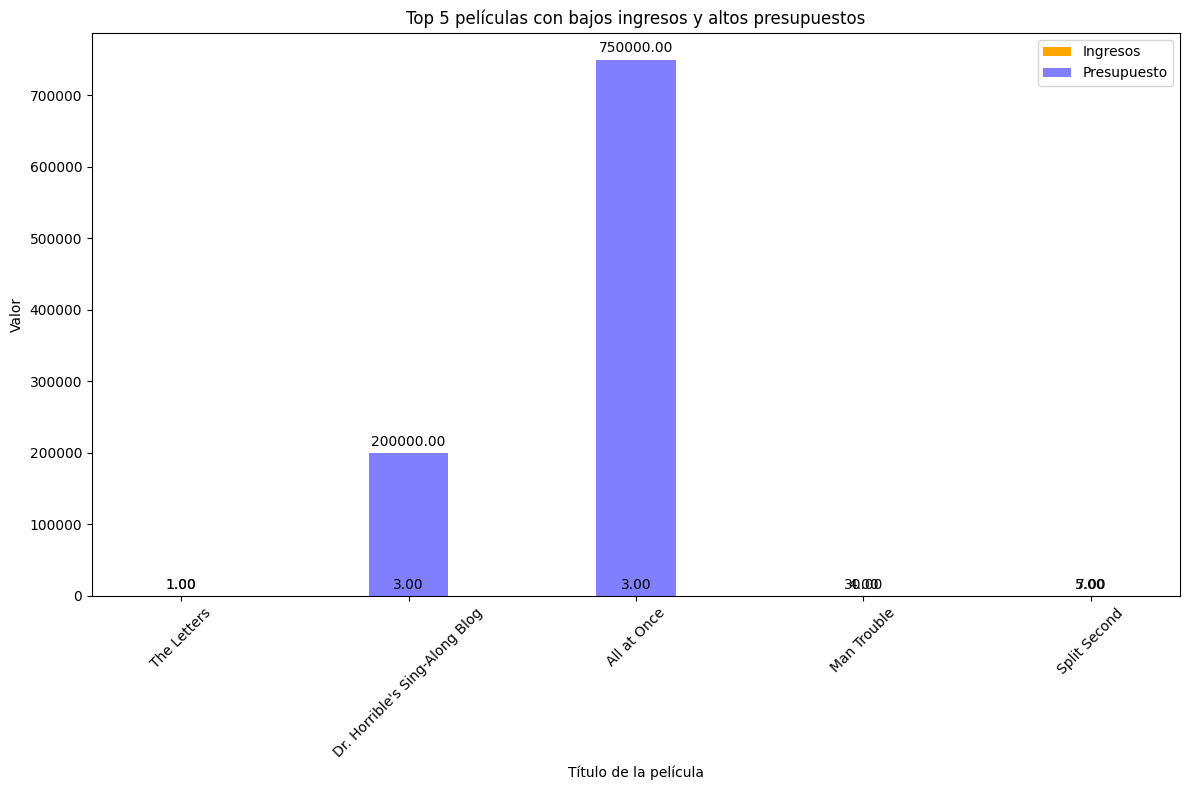

In [15]:
# Filtra las películas con ingresos bajos y presupuestos altos
filtered_movies = df[(df['revenue'] > 0) & (df['budget'] > 0)]

# Ordena las películas filtradas por ingresos en orden ascendente
sorted_movies = filtered_movies.sort_values(by='revenue', ascending=True)

# Selecciona las primeras N películas con bajos ingresos y altos presupuestos
top_n = 5  # Cambia este valor según la cantidad de películas que desees mostrar
top_movies = sorted_movies.head(top_n)

# Prepara los datos para el gráfico
index = top_movies['title']
revenue = top_movies['revenue']
budget = top_movies['budget']

# Define los colores en tonos pasteles
colors = ["orange", 'blue']

# Crea el gráfico de barras agrupadas con colores pasteles
fig, ax = plt.subplots(figsize=(12, 8))
bar_width = 0.35
opacity = 0.8
bar1 = ax.bar(index, revenue, bar_width, label='Ingresos', color=colors[0])
bar2 = ax.bar(index, budget, bar_width, label='Presupuesto', alpha=0.5, color=colors[1])

# Configura el estilo del gráfico
ax.set_xlabel('Título de la película')
ax.set_ylabel('Valor')
ax.set_title(f'Top {top_n} películas con bajos ingresos y altos presupuestos')
ax.legend()

# Añade etiquetas a las barras
def autolabel(bars):
    for bar in bars:
        height = bar.get_height()
        ax.annotate('{:.2f}'.format(height),
                    xy=(bar.get_x() + bar.get_width() / 2, height),
                    xytext=(0, 3),
                    textcoords="offset points",
                    ha='center', va='bottom')

autolabel(bar1)
autolabel(bar2)

plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

La película "All at Once" se destaca por tener el presupuesto más alto entre las películas analizadas, pero lamentablemente no generó ingresos significativos. Aunque su presupuesto fue considerable, no logró atraer a un público lo suficientemente amplio como para recuperar su inversión.

# Relación entre variables: 

Explora la relación entre variables como "popularity" y "vote_average" o "budget" y "revenue". 

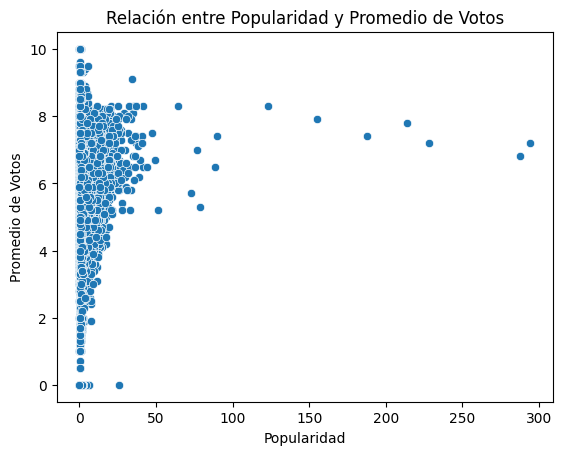

Correlación entre Popularidad y Promedio de Votos: 0.16551418507578788


In [16]:
# Gráfico de dispersión
sns.scatterplot(data=df, x='popularity', y='vote_average')
plt.xlabel('Popularidad')
plt.ylabel('Promedio de Votos')
plt.title('Relación entre Popularidad y Promedio de Votos')
plt.show()

# Correlación
correlation = df['popularity'].corr(df['vote_average'])
print('Correlación entre Popularidad y Promedio de Votos:', correlation)

# Distribución de Películas por Mes de Lanzamiento

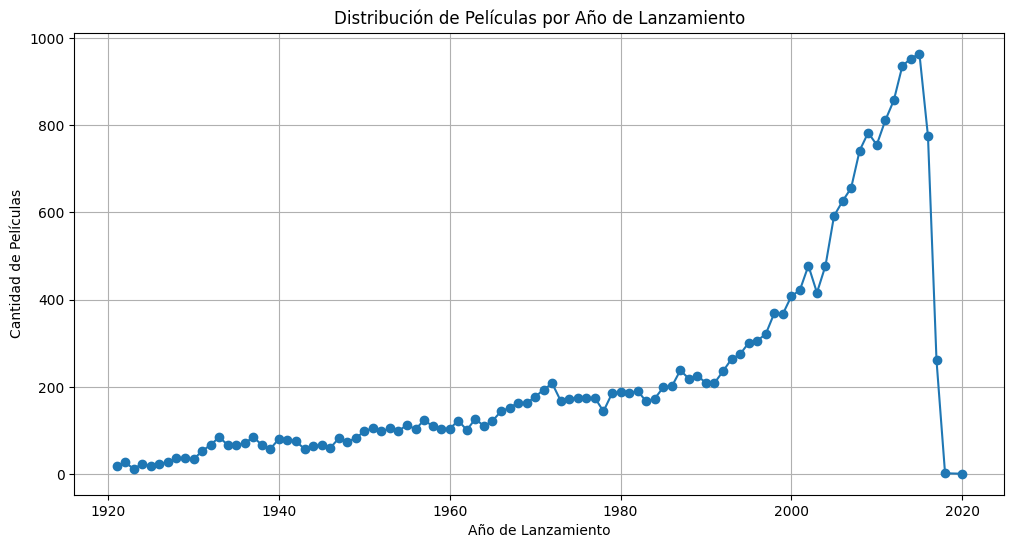

Cabe destacar que en al año 2020 durante la pandemia estuvimos casi un alo sin cine, por eso vemos una brusca caida


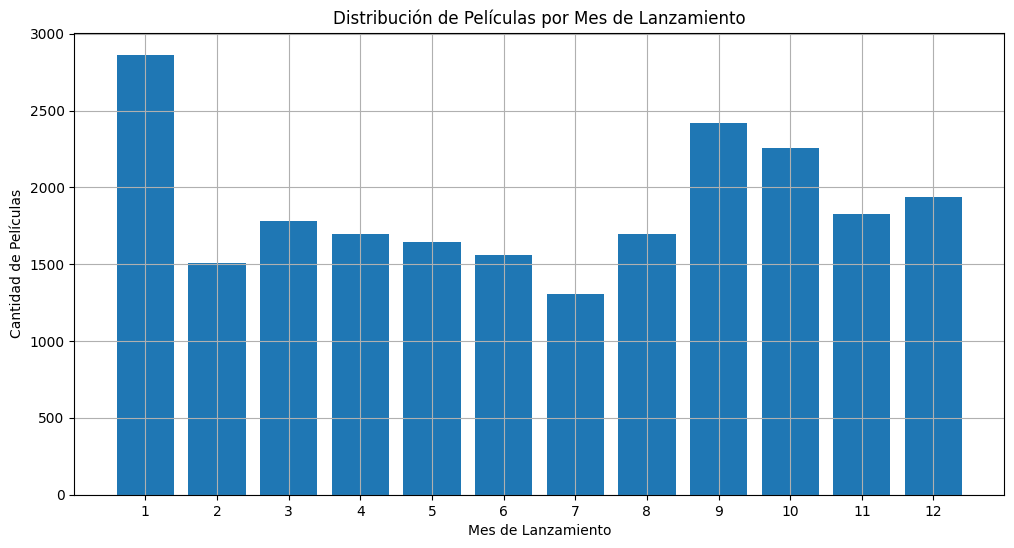

In [17]:
# Convertir la columna 'release_date' al formato de fecha adecuado
df['release_date'] = pd.to_datetime(df['release_date'])

# Extraer el año de lanzamiento y crear una nueva columna 'release_year'
df['release_year'] = df['release_date'].dt.year

# Extraer el mes de lanzamiento y crear una nueva columna 'release_month'
df['release_month'] = df['release_date'].dt.month

# Contar la cantidad de películas lanzadas por año
movies_per_year = df['release_year'].value_counts().sort_index()

# Visualizar la distribución de películas por año en un gráfico de líneas
plt.figure(figsize=(12, 6))
plt.plot(movies_per_year.index, movies_per_year.values, marker='o')
plt.xlabel('Año de Lanzamiento')
plt.ylabel('Cantidad de Películas')
plt.title('Distribución de Películas por Año de Lanzamiento')
plt.grid(True)
plt.show()

print("Cabe destacar que en al año 2020 durante la pandemia estuvimos casi un alo sin cine, por eso vemos una brusca caida")



# Contar la cantidad de películas lanzadas por mes
movies_per_month = df['release_month'].value_counts().sort_index()

# Visualizar la distribución de películas por mes en un gráfico de barras
plt.figure(figsize=(12, 6))
plt.bar(movies_per_month.index, movies_per_month.values)
plt.xlabel('Mes de Lanzamiento')
plt.ylabel('Cantidad de Películas')
plt.title('Distribución de Películas por Mes de Lanzamiento')
plt.xticks(movies_per_month.index)
plt.grid(True)
plt.show()

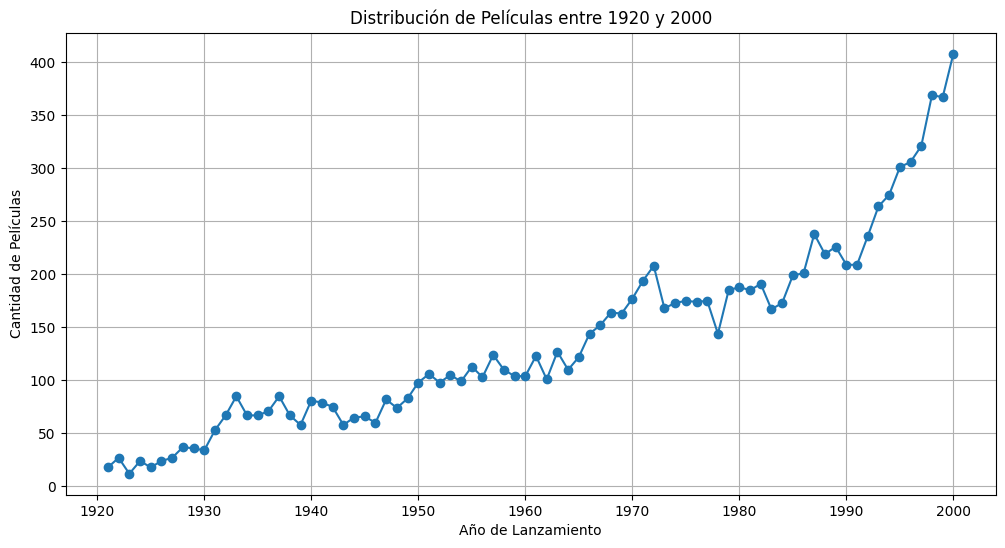

In [18]:
# Convertir la columna 'release_date' al formato de fecha adecuado
df['release_date'] = pd.to_datetime(df['release_date'])

# Filtrar las películas lanzadas entre 1970 y 2000
movies_1970_2000 = df[(df['release_date'].dt.year >= 1920) & (df['release_date'].dt.year <= 2000)]

# Contar la cantidad de películas lanzadas por año en el rango de 1970 a 2000
movies_per_year = movies_1970_2000['release_date'].dt.year.value_counts().sort_index()

# Visualizar la distribución de películas por año entre 1970 y 2000
plt.figure(figsize=(12, 6))
plt.plot(movies_per_year.index, movies_per_year.values, marker='o')
plt.xlabel('Año de Lanzamiento')
plt.ylabel('Cantidad de Películas')
plt.title('Distribución de Películas entre 1920 y 2000')
plt.grid(True)
plt.show()

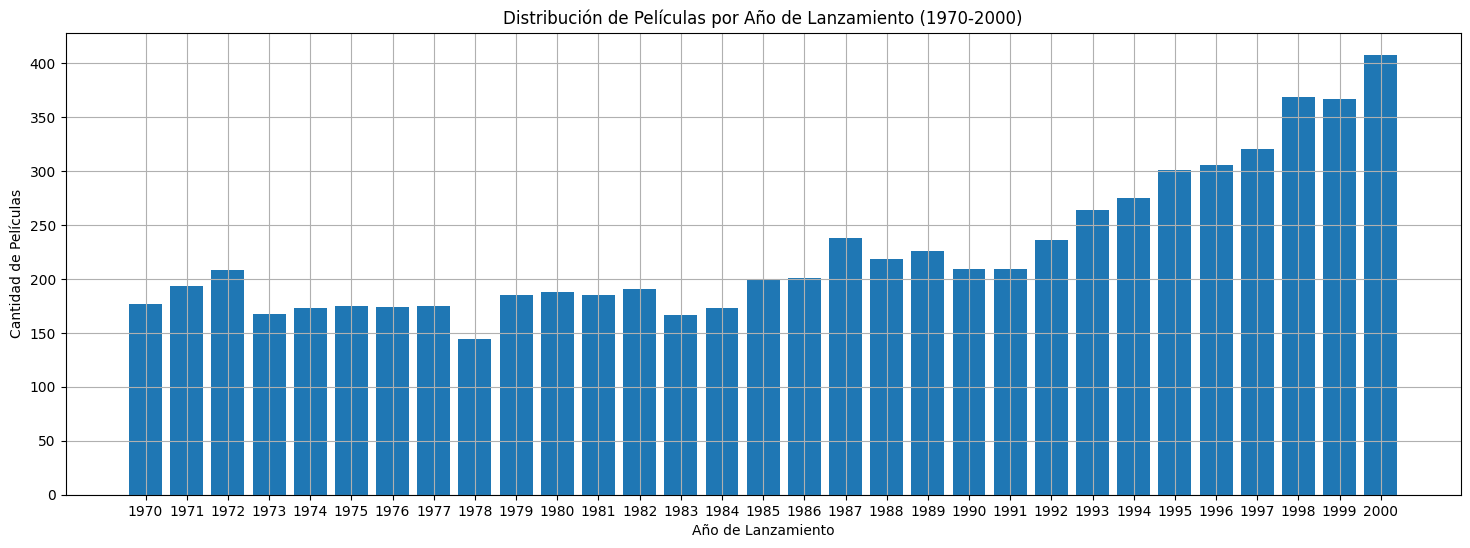

In [19]:
# Convertir la columna 'release_date' al formato de fecha adecuado
df['release_date'] = pd.to_datetime(df['release_date'])

# Filtrar las películas que se hicieron entre 1970 y 2000
filtered_df = df[(df['release_date'].dt.year >= 1970) & (df['release_date'].dt.year <= 2000)]

# Contar la cantidad de películas lanzadas por año en el rango especificado
movies_per_year = filtered_df['release_date'].dt.year.value_counts().sort_index()

# Visualizar la distribución de películas por año en un gráfico de barras
plt.figure(figsize=(18, 6))
plt.bar(movies_per_year.index, movies_per_year.values)
plt.xlabel('Año de Lanzamiento')
plt.ylabel('Cantidad de Películas')
plt.title('Distribución de Películas por Año de Lanzamiento (1970-2000)')
plt.xticks(movies_per_year.index)
plt.grid(True)
plt.show()

Durante el periodo comprendido entre 1970 y 1986, se observa que el promedio de películas anuales oscilaba entre 300 y 400 películas. Esta cifra indica una producción relativamente estable en ese periodo.

Sin embargo, a partir del año 1992 hasta el año 2000, se aprecia un incremento significativo en la producción cinematográfica, con un rango anual que va desde 450 hasta 800 películas. Este aumento en la cantidad de películas realizadas indica un crecimiento considerable de la industria del cine en ese periodo.

Varios factores pueden haber contribuido a este crecimiento histórico en la industria del cine:

Avances tecnológicos: Durante la década de 1990, hubo importantes avances tecnológicos en la industria del cine. La adopción de nuevas tecnologías como los efectos especiales, la mejora en la calidad de la cinematografía y el sonido, así como la introducción de nuevos formatos de proyección, como el IMAX, permitieron a los cineastas ampliar sus posibilidades creativas y ofrecer experiencias más inmersivas al público.

Globalización y expansión del mercado cinematográfico: Durante ese periodo, se produjo una mayor apertura y expansión de los mercados cinematográficos a nivel mundial. La distribución de películas internacionales se hizo más accesible, lo que permitió que las producciones llegaran a una audiencia más amplia. Además, la creciente demanda de contenido audiovisual en diferentes regiones del mundo generó oportunidades para la producción de más películas.

Mayor inversión en la industria cinematográfica: Es posible que se haya producido un aumento en la inversión tanto de grandes estudios de cine como de productores independientes. El respaldo financiero adicional habría permitido la realización de un mayor número de producciones cinematográficas, al contar con más recursos para la contratación de talento, el desarrollo de guiones y la producción en general.

Estos factores, combinados con otros aspectos socioeconómicos y culturales, contribuyeron al crecimiento de la industria del cine durante ese periodo. El avance tecnológico en particular jugó un papel crucial al ofrecer nuevas posibilidades creativas y mejorar la calidad de las producciones cinematográficas, lo que a su vez generó un mayor interés y demanda por parte del público.

# Países con más películas producidas

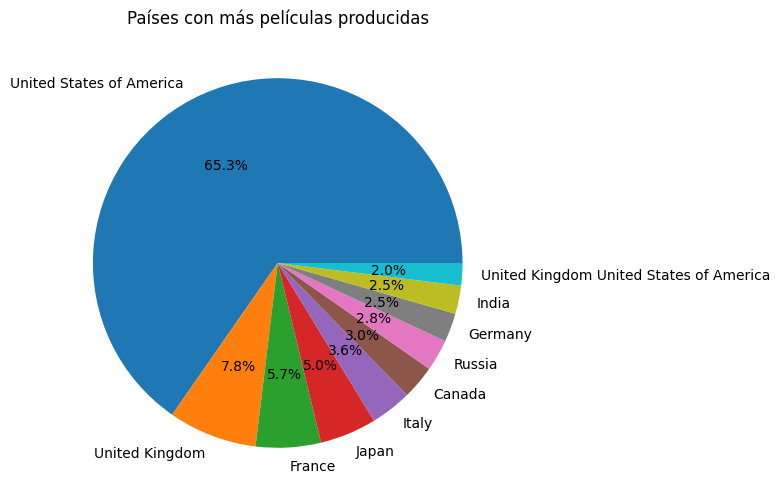

In [20]:
# Obtener el recuento de películas por país
country_counts = df['name_Count'].value_counts()

# Limitar el número de países para mostrar en la gráfica
num_countries = 10  # Puedes ajustar este valor según tus necesidades
top_countries = country_counts.head(num_countries)

# Crear la gráfica de torta
plt.figure(figsize=(8, 6))
plt.pie(top_countries, labels=top_countries.index, autopct='%1.1f%%')
plt.title('Países con más películas producidas')

# Mostrar la gráfica
plt.show()

# Grafico de calor

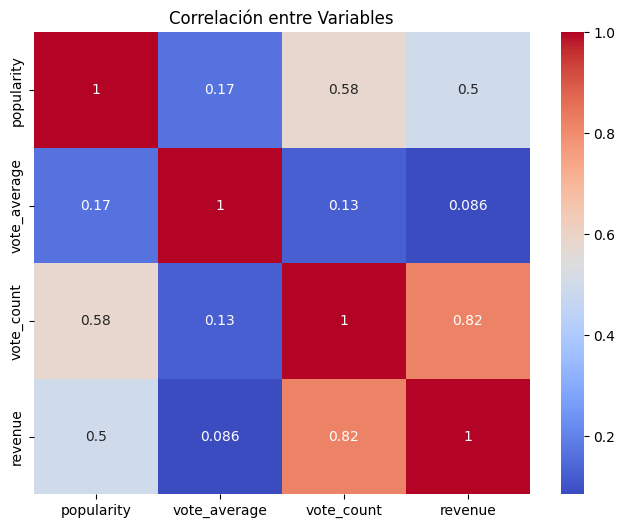

In [21]:
selected_vars = ['popularity', 'vote_average', 'vote_count', 'revenue']
selected_df = df[selected_vars]

# Calculo la matriz de correlación
correlation_matrix = selected_df.corr()

# Genero el mapa de calor
plt.figure(figsize=(8, 6))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')
plt.title('Correlación entre Variables')
plt.show()
